# [多媒體技術與應用] Homework 2<br>

<font size = 4>
    請用.ipynb交作業，檔名用HW2_學號_名稱.ipynb，例如: HW2_0123456_黃大明.ipynb

## Q1 (50%)
$$f(x)=x_1^4 + x_2^4+ x_3^3 + x_1^2 + 10x_2^2 - 5x_3^2 + x_1 + x_2 -10x_3+10$$

$$
x^* = \min_x{f(x)}
$$

請求$x^*$

1 寫出梯度方程式 (手解) <br>
    
2 寫出梯度下降法的PYTHON程式: <br>
    利用梯度下降法 ，當初始值為 
   $ \begin{bmatrix}  x_1\\ x_2\\x_3\\ \end{bmatrix} = \begin{bmatrix}  0\\ 0\\ 0\\ \end{bmatrix}$<br>
    學習率為 0.01求解，更新次數100次。<br>
    找到$x^* $和算出$f(x^*)$


$$
\begin{aligned}
\bf x &= \begin{bmatrix} x_1\\x_2\\x_3 \end{bmatrix}\\
\nabla f(\bf x) &= \begin{bmatrix} \frac{\partial f(\bf x)}{\partial x_1}\\ \frac{\partial f(\bf x)}{\partial x_2}\\ \frac{\partial f(\bf x)}{\partial x_3} \end{bmatrix}\\
&= \begin{bmatrix} \frac{\partial (x_1^4 + x_2^4+ x_3^3 + x_1^2 + 10x_2^2 - 5x_3^2 + x_1 + x_2 -10x_3+10)}{\partial x_1}\\ \frac{\partial (x_1^4 + x_2^4+ x_3^3 + x_1^2 + 10x_2^2 - 5x_3^2 + x_1 + x_2 -10x_3+10)}{\partial x_2}\\ \frac{\partial (x_1^4 + x_2^4+ x_3^3 + x_1^2 + 10x_2^2 - 5x_3^2 + x_1 + x_2 -10x_3+10)}{\partial x_3} \end{bmatrix}\\
&= \begin{bmatrix} 4x_1^3 + 2x_1 + 1\\ 4x_2^3 + 20x_2 + 1\\ 3x_3^2 - 10x_3 - 10 \end{bmatrix}\\
\end{aligned}
$$


x_star=[-0.37227757 -0.04997504  4.13872917]
f(x_star)=-46.37954129601201


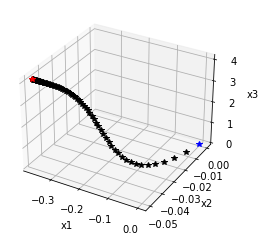

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x1, x2, x3):
    return x1 ** 4 + x2 ** 4 + x3 ** 3 + x1 ** 2 + 10 * x2 ** 2 - 5 * x3 ** 2 + x1 + x2 - 10 * x3 + 10

def g(x1, x2, x3):
    return np.array([4 * x1 ** 3 + 2 * x1 + 1, 4 * x2 ** 3 + 20 * x2 + 1, 3 * x3 ** 2 - 10 * x3 - 10])

if __name__ == '__main__':
    x_hat = np.array([0, 0, 0]) # x1, x2, x3
    plt = plt.figure().add_subplot(111, projection='3d')
    plt.plot(x_hat[0], x_hat[1], x_hat[2], 'b*')
    learn = 0.01
    update_times = 100
    for i in range(update_times):
        x_hat = x_hat - learn * g(x_hat[0], x_hat[1], x_hat[2])
        plt.plot(x_hat[0], x_hat[1], x_hat[2], 'k*')

    plt.plot(x_hat[0], x_hat[1], x_hat[2], 'r*')
    plt.set_xlabel("x1")
    plt.set_ylabel("x2")
    plt.set_zlabel("x3")
    print('x_star={}'.format(x_hat))
    print('f(x_star)={}'.format(f(x_hat[0], x_hat[1], x_hat[2])))

## Q2 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

梯度下降法求解 $\beta$ <br>
1. 初始值都從0開始，學習率0.0001，學習次數100次<br>
    
2. 初始值都從0開始，學習率0.001，學習次數100次<br>
    
3. 初始值都從10開始，學習率0.0001，學習次數100次<br>
       
4. 初始值都從10開始，學習率0.001，學習次數100次<br>
    
在每個實驗中都要劃出loss的變化，並print最後解的羅吉斯回歸的$\beta$，和算資料(X)判斷的正確率。

5. 說明一下你看到的現象。

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Load_Data_XY():
    filename='data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    # 將"性別"裡的字串自動轉換成數值
    df["性別"] = labelencoder.fit_transform(df["性別"])
    X = np.array(df[['身高', '體重']])
    Y = np.array(df['性別'])
    return X, Y

def Sigmoid(func):
    if func >= 0:
        return 1 / (1 + np.exp(-func))
    else:
        return np.exp(func) / (1 + np.exp(func))

def Get_logLoss(X, Y, B):
    loss = 0
    
    for i in range(len(X)):
        bTx = np.matmul(np.transpose(B), X[i])
        pi = Sigmoid(bTx)
        if (1 - pi != 0): # pi if very close to 1(e.g. 0.99...999), Sigmoid will return 1
            # also can use loss += -(Y[i] * np.log(pi) + (1 - Y[i]) * np.log(1 - pi))
            loss -= (Y[i] * np.log(pi / (1 - pi)) + np.log(1 - pi))
        else: # if pi == 1, that mean this(Y[i] * np.log(pi / (1 - pi)) + np.log(1 - pi)) will be 0(min loss)
            loss -= 0
        # if use sum(log(1 + np.exp(bTx)) - yi * bTx))
        # instead of -sum(yi * log(pi / (1 - pi)) + log(1 - pi)), -sum(yi * log(pi) + (1 - yi) * log(1 - pi))
        # will encounter overflow (np.exp overflow)
        
    return loss

def Logistic_regression(B, alpha, times, store, acc):
    # B = [b0(constant), b1(h), b2(w)]
    X, Y = Load_Data_XY()
    # add constant
    # X = [x0(constant), x1(h), x2(w)]
    tmp = [1.0 for i in range(len(X))]
    X = np.insert(X, 0, tmp, 1)
    
    for t in range(times):
        for i in range(len(X)):
            gradient_descent = 0
            bTx = np.matmul(np.transpose(B), X[i])
            pi = Sigmoid(bTx)
            gradient_descent += ((pi - Y[i]) * X[i])
            B = B - alpha * gradient_descent
        
        true_predict = []
        for i in range(len(X)):
            bTx = np.matmul(np.transpose(B), X[i])
            pi = Sigmoid(bTx)
            if (pi >= 0.5 and Y[i] == 1) or (pi < 0.5 and Y[i] == 0):
                true_predict.append(1)
        # Get_log_loss is sum of log_loss(n data), so we need to divide n
        # to get the log_loss of every data (mean)
        loss = Get_logLoss(X, Y, B) / len(X)
        store.append(loss)
        acc.append(len(true_predict) / len(Y))
        # print(len(true_predict), len(Y))
    return store, B, acc

def gogo(init, learn, times):
    store = [] # store loss
    accuracy = []
    init_beta = np.array([init, init, init])
    store, beta, accuracy = Logistic_regression(init_beta, learn, times, store, accuracy)
    print("beta =", beta)
    print("accuracy =", accuracy[len(accuracy) - 1])
    plt.title("log loss")
    plt.plot(list(range(times)), store)
    plt.show()
    plt.title("accuracy")
    plt.plot(list(range(times)), accuracy)
    plt.show()


1. 初始值都從0開始，學習率0.0001，學習次數100次
beta = [-0.00315328 -0.10503368  0.27997419]
accuracy = 1.0


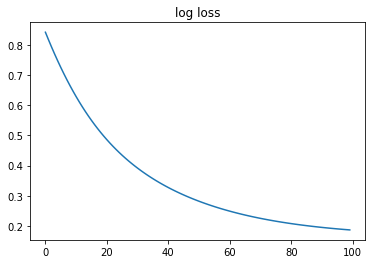

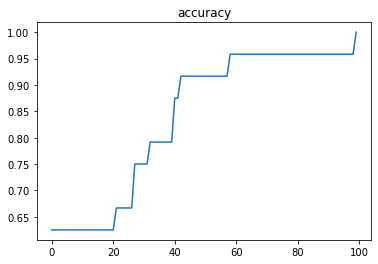

In [3]:
print("1. 初始值都從0開始，學習率0.0001，學習次數100次")
gogo(0.0, 0.0001, 100)

2. 初始值都從0開始，學習率0.001，學習次數100次
beta = [-0.01272158 -0.45801225  1.16089515]
accuracy = 0.9166666666666666


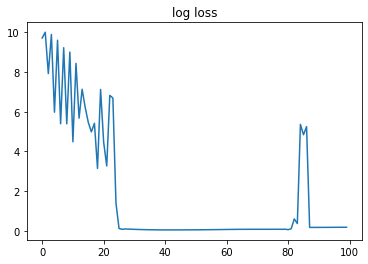

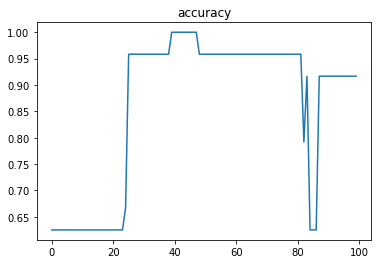

In [4]:
print("2. 初始值都從0開始，學習率0.001，學習次數100次")
gogo(0.0, 0.001, 100)

3. 初始值都從10開始，學習率0.0001，學習次數100次
beta = [ 9.92224563 -2.28042271  5.87757488]
accuracy = 1.0


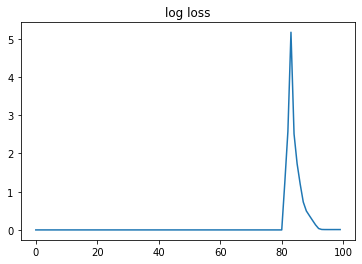

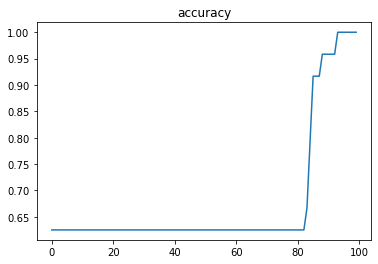

In [5]:
print("3. 初始值都從10開始，學習率0.0001，學習次數100次")
gogo(10.0, 0.0001, 100)

4. 初始值都從10開始，學習率0.001，學習次數100次
beta = [ 9.91668481 -2.41394296  6.1563558 ]
accuracy = 0.9583333333333334


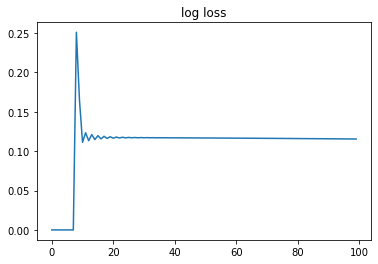

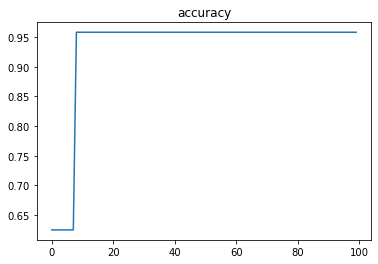

In [6]:
print("4. 初始值都從10開始，學習率0.001，學習次數100次")
gogo(10.0, 0.001, 100)

5.<br>
第一個方式(初始值都從0開始，學習率0.0001，學習次數100次) : <br>
根據loss和accuracy的圖可以看到他有穩定的去找到最佳的$\beta$，根據他們最後的資料可看出，最後有找到最佳的$\beta$。<br>
第二個方式(初始值都從0開始，學習率0.001，學習次數100次) : <br>
根據loss和accuracy的圖可看到一開始還沒找到分類的方式，所以抖動幅度比較大。差不多第25次的時候，找到比較好的解，所以loss開始接近0，accuracy有提高。在第80次左右，出現glitch，所以loss和accuracy的圖都有出變化(loss凸起，accuracy凹下)，然後因為glitch的出現，他的分類方式有出現一些變化，使他最後面的accuracy沒有向25~80次之間的accuracy這麼高。<br>
第三個方式(初始值都從10開始，學習率0.0001，學習次數100次) : <br>
根據loss和accuracy的圖可看出loss是因為一開始的值雖然都是貼著0，但是accuracy沒有很高，代表他一開始其實沒有找到正確的分類方式。到第80次之後loss的波型突然凸起，然後逐漸穩定之後，accuracy才開始提高，代表他到80次左右開始找到分類的方式，然後逐漸找到最佳的$\beta$。<br>
第四個方式(初始值都從10開始，學習率0.001，學習次數100次) : <br>
根據loss和accuracy的圖可以看出一開始的loss接近0，但是accuracy沒有很高，代表他還沒找到正確的分類方式。在第5次到第10次中間，他找到了比較好的分類方式，所以在圖中可看出後面的loss逐漸穩定，accuracy有提高到0.95多。